In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymc3 import Model, Normal, HalfNormal
from pymc3 import NUTS, sample
from scipy import optimize
from pymc3 import traceplot
from pymc3 import summary

##グループ毎線形回帰
df = pd.read_csv("data-salary-2.txt")
X_data = df.values[:,0]
Y_data = df.values[:,1]
Class_data  = df.values[:,2]-1
n_Class = len(df["KID"].unique())

##モデル記述
#Y[n] ~ Y_base[n] + \epsilon
#Y_base[n] ~ a[KDI[n]] + b[KDI[n]]X[n]
#\epsilon ~ N(0,\sigma_Y)

basic_model = Model()

with basic_model:
    # Priors for unknown model parameters
    a = Normal('a', mu=0, sd=10, shape=n_Class)
    b = Normal('b', mu=0, sd=10, shape=n_Class)
    epsilon = HalfNormal('sigma', sd=1)

    #likelihood 
    mu = a[Class_data] + b[Class_data]*X_data
    Y_obs = Normal('Y_obs', mu=mu, sd=epsilon, observed=Y_data)
    trace = sample(2000)
    summary(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -1,086.6: 100%|██████████| 200000/200000 [00:30<00:00, 6665.46it/s]
Finished [100%]: Average ELBO = -1,078.5
100%|██████████| 2000/2000 [00:08<00:00, 245.03it/s]


a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  141.657          9.128            0.264            [124.070, 159.655]
  95.327           9.062            0.284            [78.062, 112.793]
  28.734           9.608            0.295            [9.340, 46.857]
  4.703            9.387            0.263            [-13.045, 22.491]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  123.785        135.628        141.564        147.615        159.394
  78.062         89.289         95.291         101.511        112.793
  9.406          21.977         29.195         35.201         47.213
  -12.991        -1.497         4.640          11.205         23.006


b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------

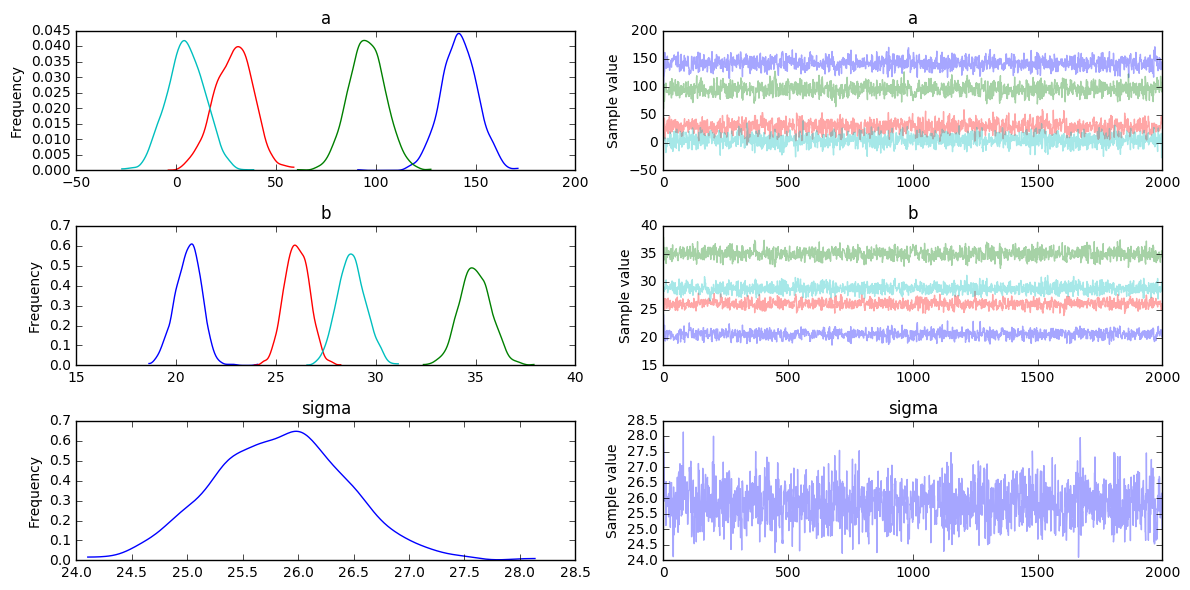

In [4]:
%matplotlib inline
traceplot(trace);